In [1]:
# Import everything this way, other ways might not work
from Lab import *

In [2]:
# Create lab instance
lab = Lab()


        Imported packages and functions:
        -----------------------------------------
        Imported matplotlib.pyplot as plt
        and imported numpy as np
        and imported pandas as pd
        and imported numpy.fft as fft
        and imported seaborn as sns
        and imported time
        and imported curve_fit from scipy.optimize
        


In [3]:
# Import data an make first experiment named "Iris data"
data = sns.load_dataset('iris')
lab.add_experiment(data, name="Iris data")

                ---- Standard analysis ----                


Pairplot of data from experiment named "Iris data":


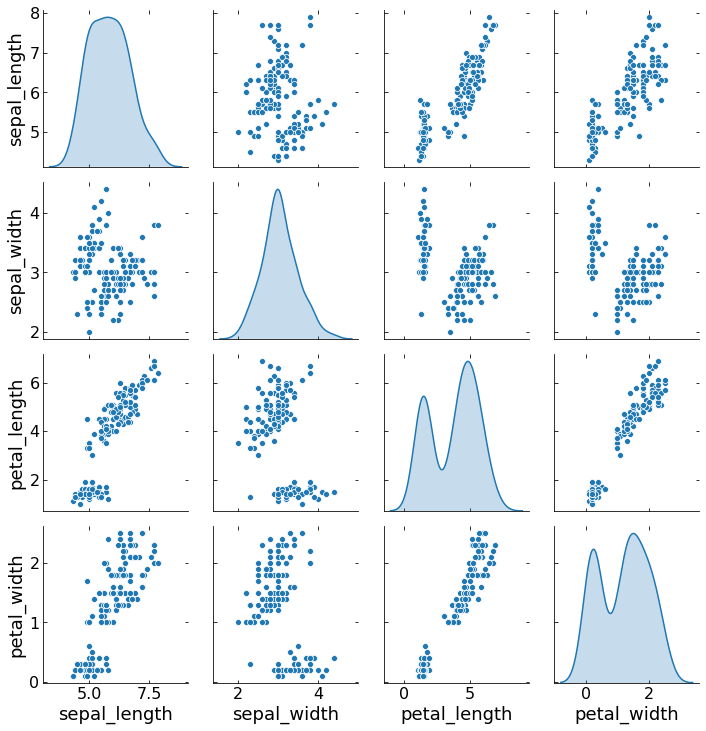



Correlation matrix of data from experiment named "Iris data":
              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.117570      0.871754     0.817941
sepal_width      -0.117570     1.000000     -0.428440    -0.366126
petal_length      0.871754    -0.428440      1.000000     0.962865
petal_width       0.817941    -0.366126      0.962865     1.000000


Info about data types and amounts from experiment named "Iris data":
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


Descriptive statistics of data from experiment named "Iris data":


In [4]:
# Make a Standard analysis on "Iris data" and save the figure,
# other options are "Bootstrap", "Scatter", "Frequency".
lab.analysis(name="Iris data", analysis_type="Standard", save=True)

                                 ---- Bootstrap analysis ----                                 


Kde-plot of data columns (petal_width, sepal_length, petal_length) from experiment named "Iris data":


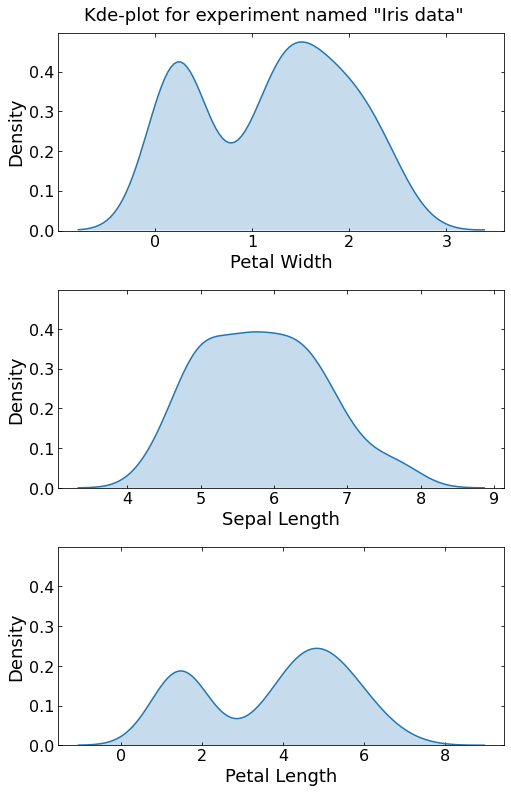

In [5]:
# Make a Bootstrap analysis on "Iris data" and save the figure
lab.analysis(name="Iris data", columns=['petal_width','sepal_length', 'petal_length'], analysis_type="Bootstrap", save=True)

                                 ---- Scatter analysis ----                                 


Scatter-plot of data columns (petal_width vs. sepal_length and petal_length vs. sepal_length)
from experiment named "Iris data":


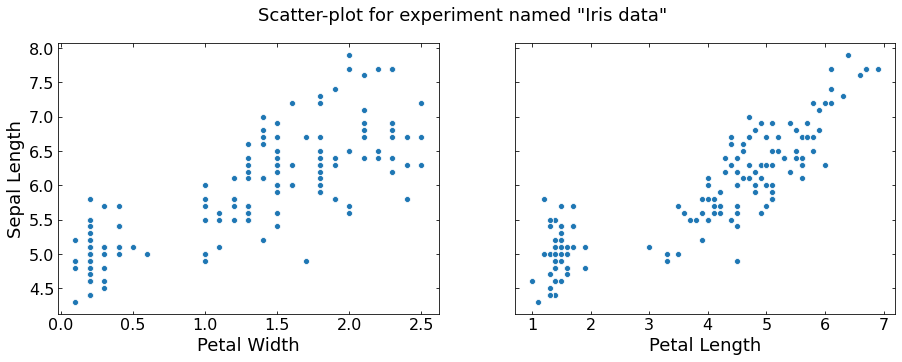

In [6]:
# Select columns
columns_scatter=[['petal_width','sepal_length'], ['petal_length','sepal_length']]

# Make a Scatter analysis on "Iris data" and save the figure
lab.analysis(name="Iris data", columns=columns_scatter, analysis_type="Scatter", save=True)

                                 ---- Frequency analysis ----                                 


Scatter-plot of data columns (xs vs. sin) from experiment named "Noisy sinus data":


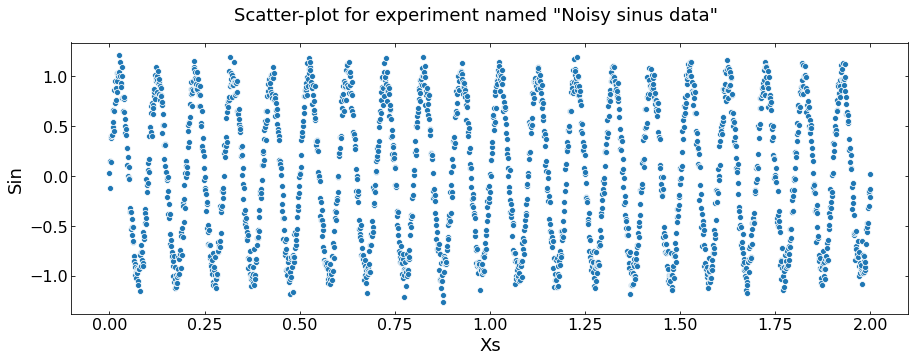



Frequency of data from experiment named "Noisy sinus data":
Frequencies found for columns xs and sin from experiment named "Noisy sinus data" given current tolerance, 0.5:  [ 10. -10.]
Given the above results, the avg frequency was found to be:  10.0


In [7]:
# Create sinus data with frequency f and sampling rate f_s on interval, "interval".
f = 10  #  Hertz
f_s = 1000  # Number of measurements per second
interval = 2
xs = np.linspace(0, interval, interval * f_s)
sin = np.sin(f * 2 * np.pi * xs)

# Add noise and create DataFrame
sin_noise = [s + np.random.normal(0,0.1) for s in sin]
df = pd.DataFrame({'xs': xs, 'sin': sin_noise})

# Import data an make second experiment named "Noisy sinus data"
lab.add_experiment(df, name="Noisy sinus data")

# Make a Frequency analysis on "Noisy sinus data" and save the figure
lab.analysis(name="Noisy sinus data", columns=[['xs','sin']], analysis_type="Frequency", save=True)

In [8]:
# Show the log notes
lab.log()

List of changes performed during lab time:

  -  Nr. 1 experiment was added and called "Iris data". (Thu Dec 30 10:34:05 2021)

  -  Standard analysis was performed on experiment called "Iris data". (Thu Dec 30 10:34:08 2021)

  -  Bootstrap analysis was performed on experiment called "Iris data". (Thu Dec 30 10:34:09 2021)

  -  Scatter analysis was performed on experiment called "Iris data". (Thu Dec 30 10:34:09 2021)

  -  Nr. 2 experiment was added and called "Noisy sinus data". (Thu Dec 30 10:34:09 2021)

  -  Frequency analysis was performed on experiment called "Noisy sinus data". (Thu Dec 30 10:34:09 2021)


In [9]:
# Add a note yourself on line 2 and show the log notes again
lab.add_note("Found mistakes in data collection", 2)
lab.log()

List of changes performed during lab time:

  -  Nr. 1 experiment was added and called "Iris data". (Thu Dec 30 10:34:05 2021)
    -  Found mistakes in data collection

  -  Standard analysis was performed on experiment called "Iris data". (Thu Dec 30 10:34:08 2021)

  -  Bootstrap analysis was performed on experiment called "Iris data". (Thu Dec 30 10:34:09 2021)

  -  Scatter analysis was performed on experiment called "Iris data". (Thu Dec 30 10:34:09 2021)

  -  Nr. 2 experiment was added and called "Noisy sinus data". (Thu Dec 30 10:34:09 2021)

  -  Frequency analysis was performed on experiment called "Noisy sinus data". (Thu Dec 30 10:34:09 2021)


In [10]:
# Get experiments data and update it
lab.experiments
lab.update(data, name="Iris data")

In [11]:
# Clean "Iris data" on columns 'petal_width','sepal_length' and 'petal_length' and save it to 'cleaned_iris.csv'
lab.clean(name="Iris data", columns=['petal_width','sepal_length', 'petal_length'], filename='cleaned_iris.csv')

This method does two things. Firstly, if provided, the value of the variable "pattern" is removed 
from all values of every column. The regex bool determines if pattern will be interpreted as a regex pattern.
Secondly it looks through every row of data from experiment named "Iris data", and
looks for values that it were not able to convert to a float, saves the index for that row,
and ultimately removes all rows that couldnt be converted to a float, and then converts every column to have float
values only. 


Are you sure you want to proceed (y/n)? y


Data cleaned...

Data uploaded...

Cleaning succesfully done!


                                 ---- Fitting ----                                 


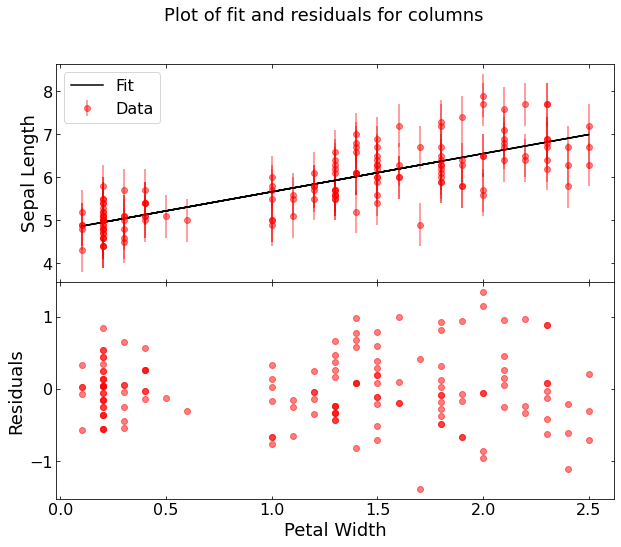



Fit of data from columns from experiment named "Iris data":


In fit nr. 1 the folowing optimal parameters was found:  [0.88858025 4.77762942]

The folowing errors was estimated for the optimal parameters:  [0.05137355 0.07293476]

----------------------------------------------------------------------------------------------


In [12]:
# Define a fit function
def func(x, a, b):
    return a*x + b

# Define errors
sigma = [[0.5]*150]

# Perform fit
popts, perrs = lab.fit(name="Iris data", columns=[['petal_width','sepal_length']], funcs=[func], guesses=None, sigma=sigma, absolute_sigma=False, method=None, residuals=True, save=True, alpha=0.5)